In [1]:
import os
from matplotlib import pyplot

In [2]:
train_dataset_path = '/home/pika/Downloads/GSR-Downloads/YOLOV35L/datasetV35L'

dataset_files = os.listdir(train_dataset_path)

annotations = list(filter(lambda file: 'txt' in file, dataset_files))

annotations = [train_dataset_path+'/'+filename for filename in annotations]

#List of Annotation Files
print(annotations[0:4])
print(len(annotations))


['/home/pika/Downloads/GSR-Downloads/YOLOV35L/datasetV35L/IMG84.txt', '/home/pika/Downloads/GSR-Downloads/YOLOV35L/datasetV35L/IMG60.txt', '/home/pika/Downloads/GSR-Downloads/YOLOV35L/datasetV35L/IMG130.txt', '/home/pika/Downloads/GSR-Downloads/YOLOV35L/datasetV35L/IMG307.txt']
489


In [3]:
space_names_path = '/home/pika/Downloads/GSR-Downloads/YOLOV35L/space.names'

space_names_file = open(space_names_path, 'r')
chars = space_names_file.readlines()

char_index_map = dict()

i=0
for char in chars:
    char_index_map[i] = char.replace('\n', '')
    i+=1

print(char_index_map)

{0: 'A', 1: 'a', 2: 'B', 3: 'b', 4: 'C', 5: 'c', 6: 'D', 7: 'd', 8: 'E', 9: 'e', 10: 'F', 11: 'f', 12: 'G', 13: 'g', 14: 'H', 15: 'h', 16: 'I', 17: 'i', 18: 'J', 19: 'j', 20: 'K', 21: 'k', 22: 'L', 23: 'l', 24: 'M', 25: 'm', 26: 'N', 27: 'n', 28: 'O', 29: 'o', 30: 'P', 31: 'p', 32: 'Q', 33: 'q', 34: 'R', 35: 'r', 36: 'S', 37: 's', 38: 'T', 39: 't', 40: 'U', 41: 'u', 42: 'V', 43: 'v', 44: 'W', 45: 'w', 46: 'X', 47: 'x', 48: 'Y', 49: 'y', 50: 'Z', 51: 'z', 52: '0', 53: '1', 54: '2', 55: '3', 56: '4', 57: '5', 58: '6', 59: '7', 60: '8', 61: '9', 62: '!', 63: '"', 64: ',', 65: '#', 66: '$', 67: '%', 68: "'", 69: '*', 70: '+', 71: '-', 72: '.', 73: '/', 74: ':', 75: ';', 76: '=', 77: '?', 78: '@', 79: 'Space'}


In [4]:
from collections import Counter

counts = Counter()

for annotation_file in annotations:

    a_file = open(annotation_file)
    a_file_lines = a_file.readlines()
    index_list = []

    for line in a_file_lines:
        index_list.append(line.split(' ')[0])

    counts.update(index_list)

count_dict = dict(counts)

char_labels = [char_index_map[int(index)] for index in count_dict.keys()]
char_count = dict(zip(char_labels, count_dict.values()))

print(char_count)

{'o': 2302, 'n': 2149, 't': 2560, 'h': 1412, 'e': 3255, 'v': 569, 'r': 1869, 'g': 832, 'i': 2188, 'm': 875, ',': 264, 'b': 651, 'p': 881, 's': 1999, 'j': 343, 'c': 1223, '.': 346, 'a': 2464, 'l': 1393, 'd': 1379, 'w': 724, '?': 36, 'u': 1071, 'H': 380, 'Space': 7363, 'y': 748, 'I': 366, 'F': 363, 'O': 402, 'B': 372, '2': 385, 'Z': 353, '6': 361, 'E': 434, '0': 344, 'X': 348, 'A': 501, 'K': 357, 'G': 390, 'C': 435, '5': 373, '1': 385, '7': 344, 'U': 351, 'T': 486, '9': 351, '4': 363, 'z': 338, 'D': 410, 'Y': 370, 'S': 502, 'k': 479, 'R': 436, 'V': 332, 'f': 834, 'Q': 378, 'P': 416, 'L': 383, 'J': 320, '3': 387, '@': 203, 'q': 361, '8': 414, 'M': 402, '/': 181, 'x': 369, '%': 148, '-': 265, '+': 179, 'W': 341, 'N': 405, ':': 55, '"': 28, "'": 76, '#': 168, '$': 193, '!': 4}


In [5]:
import pandas as pd

df = pd.DataFrame(data=char_count, index=[0])

df = (df.T)

print (df)

df.to_csv('yolov35l.csv')

       0
o   2302
n   2149
t   2560
h   1412
e   3255
..   ...
"     28
'     76
#    168
$    193
!      4

[77 rows x 1 columns]


77 77


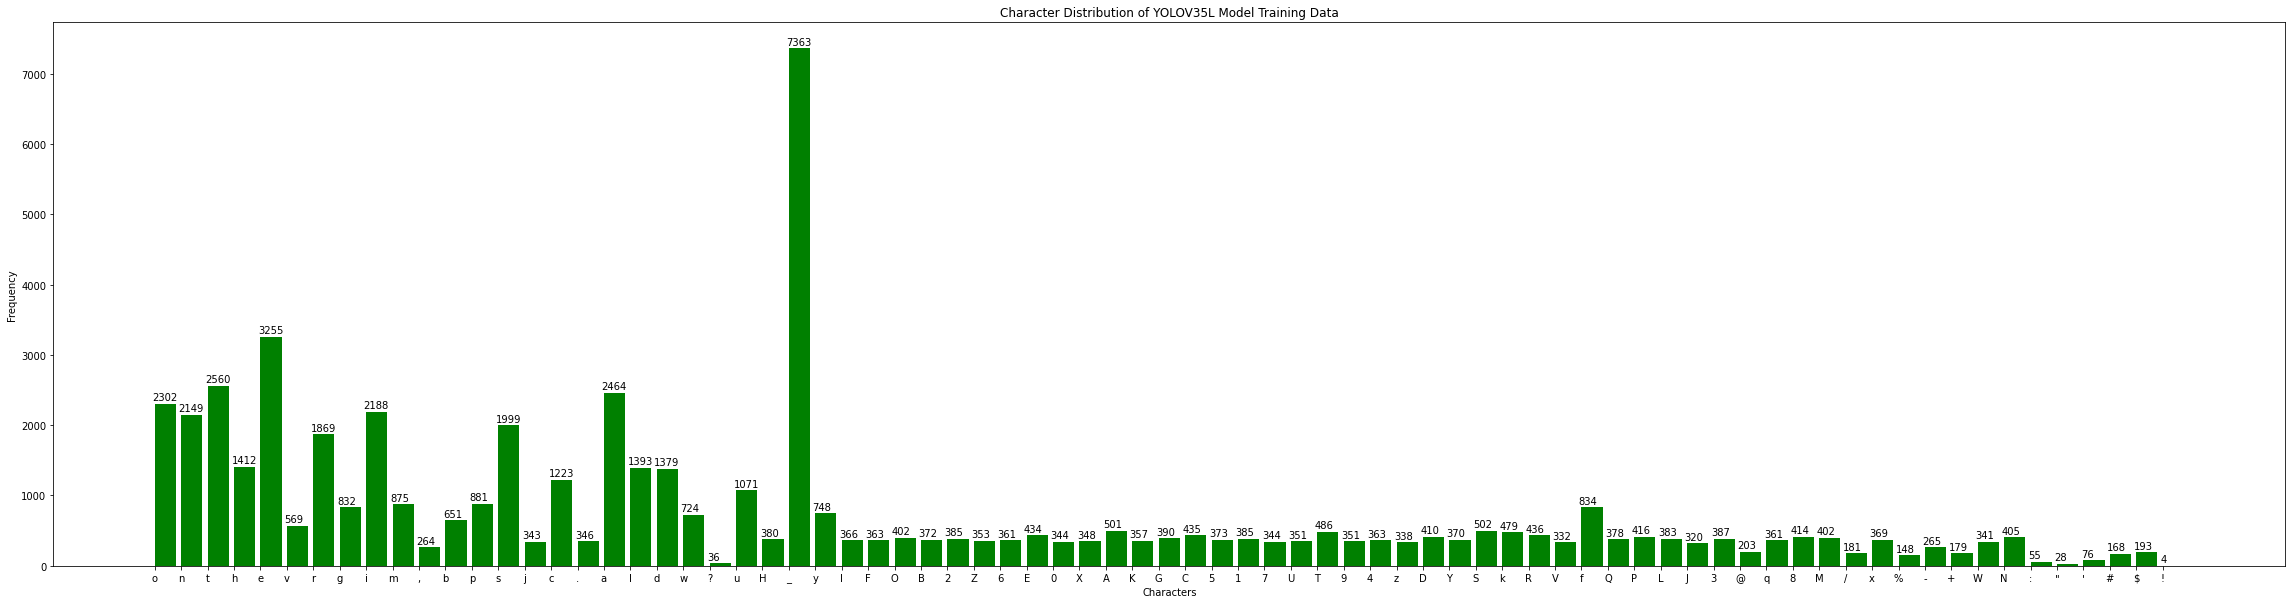

In [6]:
import numpy as np

x_labels = [char_index_map[int(index)] for index in count_dict.keys()]
y_points = list(count_dict.values())

space_index = x_labels.index('Space')
x_labels[space_index] = '_'
print(len(x_labels), len(y_points))

pyplot.figure(figsize=(40, 10))
pyplot.bar(x_labels, y_points, width=0.8, align='edge', color='g')

i=1.0
j=50
for i in range(len(x_labels)):
    pyplot.annotate(y_points[i], (-0.1 + i, y_points[i] + j))

pyplot.title("Character Distribution of YOLOV35L Model Training Data")
pyplot.xlabel("Characters")
pyplot.ylabel("Frequency")

pyplot.savefig('yolov35l.png', facecolor='white')
pyplot.show()